In [1]:
'''Gathers fundamental information about a stock using the Alpha Vantage API.'''
import os
import requests
import datetime
import time
import pandas as pd
import secrets

from ratelimit import limits, sleep_and_retry


API_URL = 'https://www.alphavantage.co/query'
api_key = secrets.ALPHAVANTAGE_API_KEY
api_tickers = ['GOOG']

api_functions = ['OVERVIEW',
                 'INCOME_STATEMENT',
                 'BALANCE_SHEET',
                 'CASH_FLOW']


def api_data_function(symbol, function, apikey):
    return {'function': function,
            'symbol': symbol,
            'outputsize': 'full',
            'datatype': 'json',
            'apikey': apikey}


@sleep_and_retry
@limits(calls=5, period=60)
def call_api(url, data):
    return requests.get(url, params=data)


def get_fundamentals_from_api(tickers, functions):
    out_dict = dict()
    for ticker in tickers:
        fund_dict = dict()
        for function in functions:
            response = call_api(API_URL, api_data_function(ticker, function, api_key))
            assert response.ok, f'Error in getting response from server. Ticker {ticker}, function {function}'
            fund_dict[function] = response.json()
        out_dict[ticker] = fund_dict
    return out_dict



if len(tickers) > 1:
    time.sleep(60)
start_time = time.time()

api_results = get_fundamentals_from_api(api_tickers, api_functions)
# for result in api_results:
#     print(result)
#     [print(api_results[result][func]) for func in api_results[result]]

print(f'Total running time: {time.time() - start_time}')

GOOG
{'Symbol': 'GOOG', 'AssetType': 'Common Stock', 'Name': 'Alphabet Inc', 'Description': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.', 'Exchange': 'NASDAQ', 'Currency': 'USD', 'Country': 'USA', 'Sector': 

In [61]:
# api_results['GOOG']['OVERVIEW']

In [3]:
def get_annual_data(data, ticker, fin_statement, fin_metric):
    return pd.DataFrame.from_records([(record['fiscalDateEnding'], record[fin_metric]) \
              for record in data[ticker][fin_statement]['annualReports']],\
                              columns=['fiscalYear', fin_metric]).set_index('fiscalYear').replace('None', 0)

<AxesSubplot:title={'center':'interestAndDebtExpense'}, xlabel='fiscalYear'>

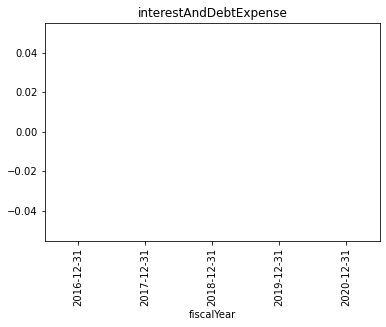

In [4]:
df = get_annual_data(data=api_results,
                    ticker='GOOG',
                    fin_statement='INCOME_STATEMENT',
                    fin_metric='interestAndDebtExpense')
df['interestAndDebtExpense'].sort_index().astype('float').plot(kind='bar', title='interestAndDebtExpense')

In [6]:
metric_map = {'INCOME_STATEMENT':['totalRevenue',
                                  'costOfRevenue',
                                  'grossProfit',
                                  'costofGoodsAndServicesSold',
                                  'operatingIncome',
                                  'sellingGeneralAndAdministrative',
                                  'researchAndDevelopment',
                                  'operatingExpenses',
                                  'investmentIncomeNet',
                                  'netInterestIncome',
                                  'interestIncome',
                                  'interestExpense',
                                  'nonInterestIncome',
                                  'otherNonOperatingIncome',
                                  'depreciation',
                                  'depreciationAndAmortization',
                                  'incomeBeforeTax',
                                  'incomeTaxExpense',
                                  'interestAndDebtExpense',
                                  'netIncomeFromContinuingOperations',
                                  'comprehensiveIncomeNetOfTax',
                                  'ebit',
                                  'ebitda',
                                  'netIncome'],
              'BALANCE_SHEET': [  'totalAssets',
                                  'totalCurrentAssets',
                                  'cashAndCashEquivalentsAtCarryingValue',
                                  'cashAndShortTermInvestments',
                                  'inventory',
                                  'currentNetReceivables',
                                  'totalNonCurrentAssets',
                                  'propertyPlantEquipment',
                                  'accumulatedDepreciationAmortizationPPE',
                                  'intangibleAssets',
                                  'intangibleAssetsExcludingGoodwill',
                                  'goodwill',
                                  'investments',
                                  'longTermInvestments',
                                  'shortTermInvestments',
                                  'otherCurrentAssets',
                                  'otherNonCurrrentAssets',
                                  'totalLiabilities',
                                  'totalCurrentLiabilities',
                                  'currentAccountsPayable',
                                  'deferredRevenue',
                                  'currentDebt',
                                  'shortTermDebt',
                                  'totalNonCurrentLiabilities',
                                  'capitalLeaseObligations',
                                  'longTermDebt',
                                  'currentLongTermDebt',
                                  'longTermDebtNoncurrent',
                                  'shortLongTermDebtTotal',
                                  'otherCurrentLiabilities',
                                  'otherNonCurrentLiabilities',
                                  'totalShareholderEquity',
                                  'treasuryStock',
                                  'retainedEarnings',
                                  'commonStock',
                                  'commonStockSharesOutstanding'],
             'CASH_FLOW':        ['operatingCashflow',
                                  'paymentsForOperatingActivities',
                                  'proceedsFromOperatingActivities',
                                  'changeInOperatingLiabilities',
                                  'changeInOperatingAssets',
                                  'depreciationDepletionAndAmortization',
                                  'capitalExpenditures',
                                  'changeInReceivables',
                                  'changeInInventory',
                                  'profitLoss',
                                  'cashflowFromInvestment',
                                  'cashflowFromFinancing',
                                  'proceedsFromRepaymentsOfShortTermDebt',
                                  'paymentsForRepurchaseOfCommonStock',
                                  'paymentsForRepurchaseOfEquity',
                                  'paymentsForRepurchaseOfPreferredStock',
                                  'dividendPayout',
                                  'dividendPayoutCommonStock',
                                  'dividendPayoutPreferredStock',
                                  'proceedsFromIssuanceOfCommonStock',
                                  'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet',
                                  'proceedsFromIssuanceOfPreferredStock',
                                  'proceedsFromRepurchaseOfEquity',
                                  'proceedsFromSaleOfTreasuryStock',
                                  'changeInCashAndCashEquivalents',
                                  'changeInExchangeRate']}

In [7]:
def annual_data_into_df(ticker, metric_map, json_data, trim_key=False):
    df_annual = pd.DataFrame()
    for statement in metric_map:
        for metric in metric_map[statement]:        
            df_tmp = get_annual_data(data=json_data,
                                     ticker=ticker,
                                     fin_statement=statement,
                                     fin_metric=metric).sort_index().astype('float')
            if df_annual.empty:
                df_annual = df_tmp
            else:
                df_annual = df_annual.join(df_tmp, how='inner')
    df_annual.sort_index(inplace=True)
    if trim_key: 
        df_annual.index = df_annual.index.str.replace('-12-31', '')
    return df_annual

In [59]:
def df_to_csv(df, folder, ticker, report_type, year):
    out_name = f'{folder}/{ticker}_{max_year}_{report_type}_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
    df.to_csv(out_name, sep=';', encoding='utf8')

In [12]:
df_annual = annual_data_into_df('GOOG', metric_map, api_results, trim_key=True)

In [41]:
# Save the annual results into csv

df_to_csv(df=df_annual,
         folder='./annual_reports',
         ticker='GOOG',
         report_type='annual',
         year=df_annual.index.max())

In [38]:
def overview_into_df(ticker, json_data):
    df = pd.Series(dict(json_data[ticker]['OVERVIEW'])).to_frame().rename(columns={0:'Value'})
    df.index.rename('Metric', inplace=True)
    return df

In [60]:
# Save overview into csv
df_overview = overview_into_df('GOOG', api_results)
df_to_csv(df=overview_into_df('GOOG', api_results),
         folder='./overviews',
         ticker='GOOG',
         report_type='overview',
         year=df_overview.loc['LatestQuarter'].values[0][:4])


In [1]:
'''Gathers fundamental information about a stock using the Alpha Vantage API.'''
import os
import requests
import datetime
import time
import pandas as pd
import secrets

from ratelimit import limits, sleep_and_retry
from functions import *
from metrics import metric_map

API_URL = 'https://www.alphavantage.co/query'
api_key = secrets.ALPHAVANTAGE_API_KEY
api_tickers = ['GOOG']

api_functions = ['OVERVIEW',
                 'INCOME_STATEMENT',
                 'BALANCE_SHEET',
                 'CASH_FLOW']

if __name__ == '__main__':

    # API rate limit
    if len(api_tickers) > 1:
        time.sleep(60)
    start_time = time.time()

    # Query the API
    api_results = get_fundamentals_from_api(tickers=api_tickers,
                                            functions=api_functions,
                                            api_url=API_URL,
                                            api_key=api_key)
    df_annual = annual_data_into_df('GOOG', metric_map, api_results, trim_key=True)

    # Save the annual results into csv
    df_to_csv(df=df_annual,
              folder='./annual_reports',
              ticker='GOOG',
              report_type='annual',
              year=df_annual.index.max())

    # Save overview into csv
    df_overview = overview_into_df('GOOG', api_results)
    df_to_csv(df=overview_into_df('GOOG', api_results),
              folder='./overviews',
              ticker='GOOG',
              report_type='overview',
              year=df_overview.loc['LatestQuarter'].values[0][:4])

In [4]:
for i in range(10):
    if i > 0 and i % 4 ==0: print(i)

4
8


In [5]:
time.time() - start_time

1665.6857841014862

In [7]:
    running_time = time.time() - start_time
    if running_time < 60:
        print(f'Total running time: {round(running_time)} sec')
    else:
        print(f'Total running time: {round(running_time/60)} min')

Total running time: 29 min
